<a href="https://colab.research.google.com/github/Danila-programist/Numerical-methods/blob/main/integration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Вариант 3

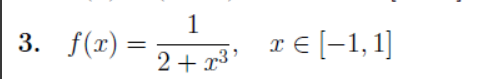

1. Реализация функций, вычисляющих численно интегралы, используя формулы правых прямоугольников, трапеции и Симпсона значения $I=\int_{a}^{b} f(x)\, dx$ на отрезке $[a,b]$ на равномерной сетке.

In [3]:
import math
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import quad


def function_np(x: np.ndarray) -> np.ndarray:
    return 1 / (2 + x**3)

def right_rectangle(x: np.ndarray, h: float) -> np.ndarray:
    F_right = function_np(x[1:]) * h
    return F_right

def trapezoid(x: np.ndarray, h: float) -> np.ndarray:
    F_trapezoid = (function_np(x[:-1]) + function_np(x[1:])) * h * 0.5
    return F_trapezoid

def simpson(x: np.ndarray, h: float) -> np.ndarray:
    F_simpson = (function_np(x[:-1]) + 4 * function_np((x[:-1] + x[1:]) / 2) + function_np(x[1:])) * h / 6
    return F_simpson

2. Для каждой формулы получить зависимости модуля ошибки от шага сетки. Для вычисления ошибки использовать точное значение интеграла, посчитанное аналитически. Полученные зависимости отобразить на одном графике, используя логарифмический масштаб.

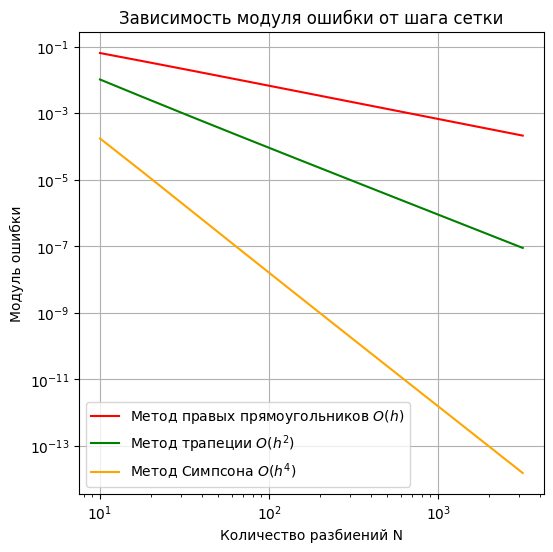


Значения при N = 200
Интеграл по методу правых прямоугольников: 1.0382128757365932
Интеграл по методу трапеции: 1.0415629594886868
Интеграл по методу Симпсона: 1.041540518275073
Точное значение интеграла: 1.0415405172934764


In [17]:
a = -1
b = 1
exact_integral, _ = quad(function_np, a, b)

# Функция для вычисления ошибки для разных шагов сетки
def calculate_error(method, a, b, exact_integral, N_values):
    errors = []
    for N in N_values:
        h = (b - a) / (N - 1)
        x_array = np.linspace(a, b, N)
        if method == "right_rectangle":
            F = right_rectangle(x_array, h)
        elif method == "trapezoid":
            F = trapezoid(x_array, h)
        elif method == "simpson":
            F = simpson(x_array, h)
        error = np.abs(exact_integral - np.sum(F))
        errors.append(error)
    return errors

# Массив возможных значений N (количества разбиений)
N_values = np.logspace(1, 3.5, 10, dtype=int)  # от 10 до 1000 (логарифмическая шкала)

# Вычисление ошибки для каждого метода
errors_right_rectangle = calculate_error("right_rectangle", a, b, exact_integral, N_values)
errors_trapezoid = calculate_error("trapezoid", a, b, exact_integral, N_values)
errors_simpson = calculate_error("simpson", a, b, exact_integral, N_values)

# Построение графика зависимости ошибки от шага сетки
plt.figure(figsize=(6, 6))

# Логарифмическая шкала для оси X и Y
plt.loglog(N_values, errors_right_rectangle, label="Метод правых прямоугольников $O(h)$", color='red')
plt.loglog(N_values, errors_trapezoid, label="Метод трапеции $O(h^2)$", color='green')
plt.loglog(N_values, errors_simpson, label="Метод Симпсона $O(h^4)$", color='orange')

# Оформление графика
plt.title("Зависимость модуля ошибки от шага сетки")
plt.xlabel(f"Количество разбиений N")
plt.ylabel("Модуль ошибки")
plt.legend()

# Отображение графика
plt.grid(True)
plt.show()

# Параметры сетки
a = -1
b = 1
N = 200
h = (b - a) / (N - 1)
x_array = np.linspace(a, b, N)
x_smooth = np.linspace(a, b, 10000)

# Вычисление значений для каждого метода на маленьком кусочке
F_right = right_rectangle(x_array, h)
F_trapezoid = trapezoid(x_array, h)
F_simpson = simpson(x_array, h)

# Итоговые результаты интегралов (суммируем F(i) для каждого метода)
integration_rigth = np.sum(F_right)
integration_trapezoid = np.sum(F_trapezoid)
integration_simpson = np.sum(F_simpson)

# Вывод значений
print(f"\nЗначения при N = {N}")
print(f"Интеграл по методу правых прямоугольников: {integration_rigth}")
print(f"Интеграл по методу трапеции: {integration_trapezoid}")
print(f"Интеграл по методу Симпсона: {integration_simpson}")
print(f"Точное значение интеграла: {exact_integral}")